In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
MedicalCost = pd.read_csv("insurance.csv")
df = MedicalCost.copy()
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


İlk 5 veriyi gözlemledim çocuğu olmayanlarda masrafların daha az, yaş ilerledikçe ve çocuk sahibi olanlarda masrafların biraz daha fazla olduğunu ve bulunulan bölgeye göre masrafın değişiklik gösterdiğini ama 60 yaş üstü hastaların kronik rahatsızlıkları artış göstermiş olacak ki çocuğa bağlı olmaksızın masrafların daha da çok arttığını gözlemledim. Ayrıca sigara içme kriterininde masraflarda çok etkili olduğu gözlenmektedir.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print("{} tane var".format(df.duplicated().sum()))

1 tane var


Tekrar eden değerleri boyut kaplaması açısından tespit edip kaldıracağım çünkü hedefim modelimi en az hatayla tamamlayabilmek.

In [5]:
df.drop_duplicates(inplace=True)
print("{} tane var".format(df.duplicated().sum()))

0 tane var


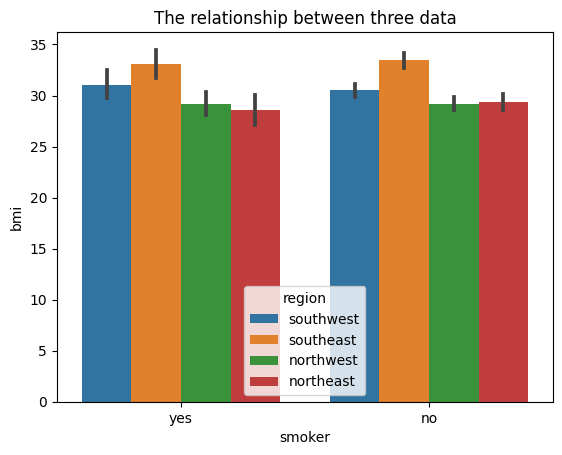

In [6]:
a = sns.barplot(x = "smoker",y ="bmi", hue = "region",data =df);
a.set_title("The relationship between three data");

Bar grafiğini kullanarak “region”, “smoker” ve “bmi” arasındaki ilişkiyi inceledim.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


Bu verilere bakarak smoker,sex ve region kategorilerinin object tipinde oldukları için hesaba girmediklerini gördüm ancak masraflarda önemli ölçüde etkisinin olduğunu düşündüğümden. Onlara 0 ve 1 olarak etiketleme işlemi yapacağım.

In [12]:

df.replace({'sex':{'male':0, 'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [9]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [11]:
data_prediction= reg.predict(X_train)

r2_train=metrics.r2_score(Y_train, data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.7584123253312958


In [16]:
prediction= reg.predict(X_test)

r2_test=metrics.r2_score(Y_test, prediction)
print('R squared value: ', r2_test)

R squared value:  0.7150366419551837


In [18]:
from sklearn.metrics import mean_absolute_error
y_pred = pd.Series(reg.predict(X_test))
mean_absolute_error(Y_test, y_pred)

4477.453368086938

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = pd.Series(reg.predict(X_test))
mean_squared_error(Y_test, y_pred)

43040005.360445976